In [1]:
import matplotlib
from matplotlib import transforms, pyplot as plt
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
from pyfonts import load_font
import pandas as pd


%matplotlib inline

In [2]:
# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

In [3]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

In [4]:
def rainbow_text(x, y, text, colors, spacing=20, ax=None, **kw):
    colors = list(reversed(colors))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, line in enumerate(reversed(text.split('\n'))):
        strings = line.split('||')
        for s, c in zip(strings, colors[i]):
            text = ax.text(x, y, s, color=c, transform=t, **kw)
            text.draw(canvas.get_renderer())
            ex = text.get_window_extent()
            t = transforms.offset_copy(text._transform, x=ex.width, 
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * spacing, 
                                   units='dots')

In [5]:
# # configure plot font family to Arial
# plt.rcParams['font.family'] = 'Arial'
# # configure mathtext bold and italic font family to Arial
# matplotlib.rcParams['mathtext.fontset'] = 'custom'
# matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
# matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

# Horizontal Bar chart

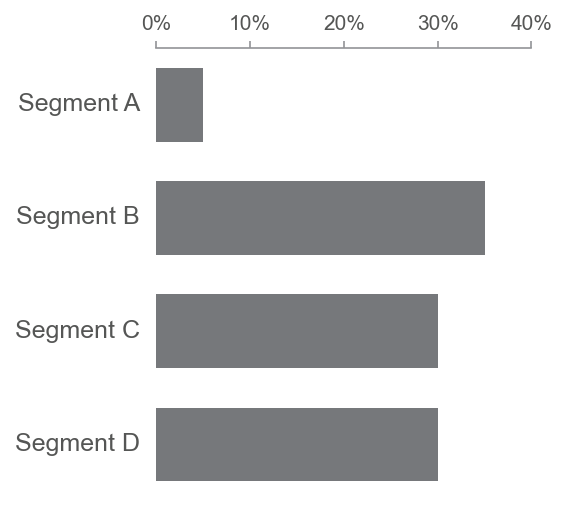

In [6]:
X = list(reversed(['Segment A', 'Segment B', 'Segment C', 'Segment D']))
Y = list(reversed([5, 35, 30, 30]))


fig, ax1 = plt.subplots(figsize=(10, 6), dpi=150)
fig.subplots_adjust(left=0.28, right=0.53, top=0.61, bottom=0.107)
ax1.barh(range(len(X)), Y, height=0.65, color=[GRAY5]*4)
ax1.set_xlim([0, 40])
ax1.set_ylim([-0.5, 3.5])
plt.setp(ax1,
         xticks=[0, 10, 20, 30, 40],
         xticklabels=['0%', '10%', '20%', '30%', '40%'],
         yticks=np.arange(len(X)),
         yticklabels=X)
ax1.tick_params(top='on', bottom='off', left='off', 
                labelbottom='off', labeltop='on')
ax1.tick_params(axis='y',  length=0)  # Set the tick length to 0
for item in ax1.get_xticklabels():
    item.set_color(GRAY3)
for item in ax1.get_yticklabels():
    item.set_fontsize(12)
    item.set_color(GRAY3)
    # use trasformations to shift y tick labels
    # left y labels slightly right, and right labels slightly left
    offset = transforms.ScaledTranslation(-0.06, 0.02, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)
ax1.tick_params(color=GRAY7)
ax1.spines['top'].set_color(GRAY7)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

ax1.tick_params(axis='x', bottom=False, labelbottom=False)  # Hide bottom ticks and labels
ax1.spines['bottom'].set_visible(False)  # Hide the bottom spine

## Stacked Percentage Bar Chart

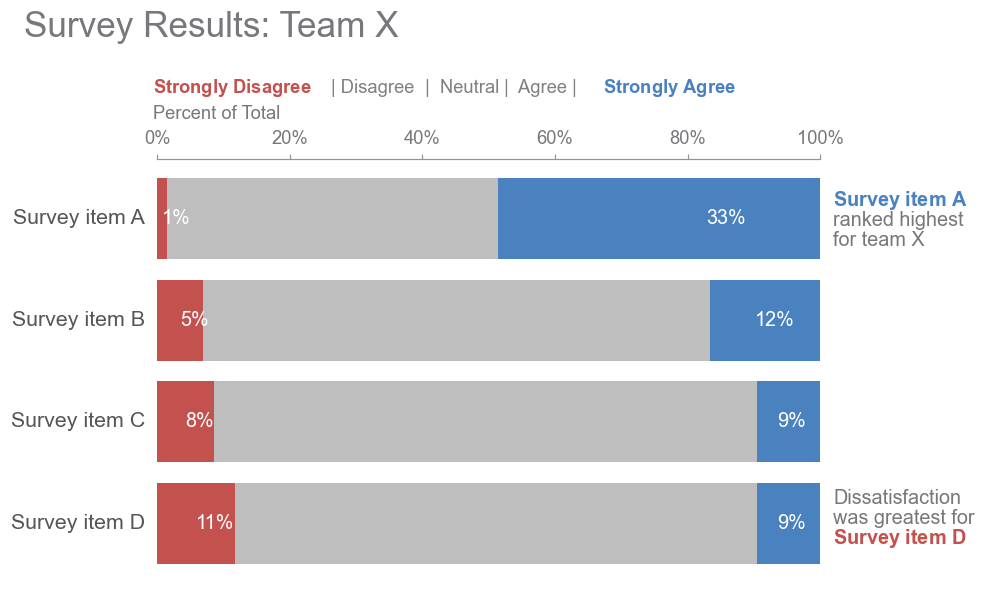

In [7]:
# Data for the survey items
survey_items = ['Survey item A', 'Survey item B', 'Survey item C', 'Survey item D']
strongly_disagree = [1, 5, 8, 11]
disagree = [4, 10, 12, 9]
neutral = [10, 20, 25, 15]
agree = [20, 25, 40, 50]
strongly_agree = [33, 12, 9, 9]

# Ensure all bars sum to 100%
total = np.array(strongly_disagree) + np.array(disagree) + np.array(neutral) + np.array(agree) + np.array(strongly_agree)

# Creating figure and axes
fig, ax = plt.subplots(figsize=(9, 4.65), # width, height in inches
                        dpi=110)           # resolution of the figure

ax.invert_yaxis()
# tune the subplot layout by setting sides of the figure
#fig.subplots_adjust(left=0.28, right=0.53, top=0.61, bottom=0.107)
fig.subplots_adjust(left=0.445, right=0.765, top=0.77, bottom=0.01)

# Plotting the stacked bar chart with percentages normalized to 100%
ax.barh(survey_items, np.array(strongly_disagree) / total * 100, color=RED1, label='Strongly Disagree')
ax.barh(survey_items, np.array(disagree) / total * 100, left=np.array(strongly_disagree) / total * 100, color=GRAY9, label='Disagree')
ax.barh(survey_items, np.array(neutral) / total * 100, left=(np.array(strongly_disagree) + np.array(disagree))/ total * 100, color=GRAY9, label='Neutral')
ax.barh(survey_items, np.array(agree) / total * 100, left=(np.array(strongly_disagree) + np.array(disagree) + np.array(neutral)) / total * 100, color=GRAY9, label='Agree')
ax.barh(survey_items, np.array(strongly_agree) / total * 100, left=(np.array(strongly_disagree) + np.array(disagree) + np.array(neutral) + np.array(agree)) / total * 100, color=BLUE2, label='Strongly Agree')

ax.set_xlim([0, 100])

# # set properties for axes object
plt.setp(ax,
         xticks=[0, 20, 40, 60, 80, 100],  # 5 x-ticks only 0 and 1
         xticklabels=['0%', '20%', '40%', '60%', '80%', '100%'],  # with n% labels
         #yticks=np.arange(len(survey_items)),
         #yticklabels=survey_items,
         )  # with text labels

# change the appearance of ticks, tick labels, and gridlines 
ax.tick_params(top='on', bottom='off', left='off', labelbottom='off', labeltop='on')
ax.tick_params(axis='y',  length=0)  # Set the tick length to 0

for item in ax.get_xticklabels():
    item.set_color(GRAY5)
    item.set_fontsize(12)
for item in ax.get_yticklabels():
    item.set_fontsize(14)
    item.set_color(GRAY3)
    # use trasformations to shift y tick labels
    # left y labels slightly right, and right labels slightly left
    offset = transforms.ScaledTranslation(-0.06, 0.02, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)


ax.tick_params(color=GRAY7)
ax.spines['top'].set_color(GRAY7)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Hiding the bottom X-axis
ax.tick_params(axis='x', bottom=False, labelbottom=False)  # Hide bottom ticks and labels
ax.spines['bottom'].set_visible(False)  # Hide the bottom spine

# # Adding custom annotations
#ax.text(102, 0, 'Survey item A\nranked highest\nfor team X', fontsize=12, color='#4575B4', ha='left', va='center')
#ax.text(102, 3, 'Dissatisfaction\nwas greatest\nfor Survey item D', fontsize=12, color=RED1, ha='left', va='center')

rainbow_text(102, 0.27,
             '$\\bf{Survey\ item\ A}$\n'
             'ranked highest\n'
             'for team X',
             [[BLUE2], [GRAY5], [GRAY5]],
             spacing=20,
             ax=ax,
             fontsize=13
             )

rainbow_text(102, 3.2,
             'Dissatisfaction\n'
             'was greatest for\n'
             '$\\bf{Survey\ item\ D}$',
             [[GRAY5], [GRAY5], [RED1]],
             spacing=20,
             ax=ax,
             fontsize=13
             )


# Adding percentage labels inside the bars
for i, (sd, d, n, a, sa, tot) in enumerate(zip(strongly_disagree, disagree, neutral, agree, strongly_agree, total)):
    ax.text(sd / tot * 50, i, f'{sd}%', va='center', ha='left', color='white', fontsize=13)
    ax.text((sd + d + n + a + sa) / tot * 100 - sa / tot * 23, i, f'{sa}%', va='center', ha='right', color='white', fontsize=13)



plt.figtext(0.03, 1.1, 'Survey Results: Team X', color=GRAY5, fontsize=23)

plt.figtext(0.16, 0.99, '$\\bf{Strongly\ Disagree}$', color=RED1, fontsize=12)
plt.figtext(0.16, 0.94, 'Percent of Total', color=GRAY5, fontsize=12)
plt.figtext(0.34, 0.99, '| Disagree', color='gray', fontsize=12)
plt.figtext(0.43, 0.99, ' |  Neutral  ', color='gray', fontsize=12)
plt.figtext(0.51, 0.99, ' |  Agree |', color='gray', fontsize=12)
plt.figtext(0.61, 0.99, ' $\\bf{Strongly\ Agree}$', color=BLUE2, fontsize=12)

# Display the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Using Cumsum

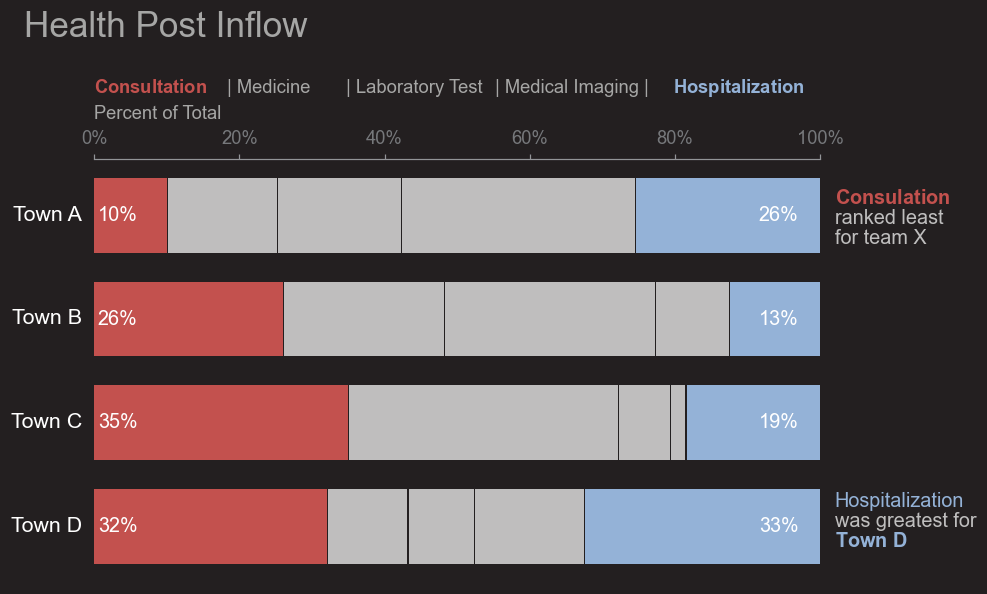

In [8]:
category_names = ['Consultation', 'Medicine', 'Lab Test', 'Medical Imaging', 'Hospitalization']

results = {
    "Town A": [10, 15, 17, 32, 26],
    "Town B": [26, 22, 29, 10, 13],
    "Town C": [35, 37, 7, 2, 19],
    "Town D": [32, 11, 9, 15, 33],
}

def plot_survey_items(results, category_names, filename=None):

    labels = list(results.keys()) # Extract y axis labels (string)
    data = np.array(list(results.values())) # Extract y axis values (float, int)
    data_cum = data.cumsum(axis=1) # Cumulative values
    category_colors = np.array( [
        [RED1, GRAY9, GRAY9, GRAY9, BLUE3],
        [RED1, GRAY9, GRAY9, GRAY9, BLUE3],
        [RED1, GRAY9, GRAY9, GRAY9, BLUE3],
        [RED1, GRAY9, GRAY9, GRAY9, BLUE3],
        [RED1, GRAY9, GRAY9, GRAY9, BLUE3],
        [RED1, GRAY9, GRAY9, GRAY9, BLUE3],
    ])

    fig, ax = plt.subplots(figsize=(9, 4.65), dpi=110, facecolor=GRAY1) # set the figure to be black (outside of the plot)
    ax.set_facecolor(GRAY1) # set only inside of the plot black
    ax.invert_yaxis() # invert because we are using horizontal bar instead of vertical
    fig.subplots_adjust(left=0.445, right=0.765, top=0.77, bottom=0.01)
    
    #ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    gap = 0.15


    # Plotting the stacked horizontal bars
    for i, colname in enumerate(category_names):
        widths = data[:, i]  # Column values
        if i == 0:
            starts = data_cum[:, i] - widths # Calculate where the bars start
        else:
            starts = data_cum[:, i-1] + (gap * i)


        color = np.array([category_colors[j][i] for j in range(len(labels))])  # Color for each bar
        ax.barh(labels, widths, left=starts, height=0.72, label=colname, color=color)
        xcenters = starts + widths / 2  # X positions for the text

        if colname in ['Consultation', 'Hospitalization']:
            for y, (x, c) in enumerate(zip(xcenters, widths)):
                #text_color = 'white' if color[y] == GRAY9 else 'black'  # Contrast based on color
                text_color = 'white'

                if colname == "Consultation":
                    ax.text(x - widths[y] / 2 + 0.5, y, f'{int(c)}%', ha='left', va='center', color=text_color, fontsize=13)
                else:
                    ax.text(100 -3, y, f'{int(c)}%', ha='right', va='center', color=text_color, fontsize=13)
    
    plt.setp(ax,
         xticks=[0, 20, 40, 60, 80, 100],  # 5 x-ticks only 0 and 1
         xticklabels=['0%', '20%', '40%', '60%', '80%', '100%'],  # with n% labels
         #yticks=np.arange(len(survey_items)),
         #yticklabels=survey_items,
         )  # with text labels
    
    # change the appearance of ticks, tick labels, and gridlines 
    ax.tick_params(top='on', bottom='off', left='off', labelbottom='off', labeltop='on')
    ax.tick_params(axis='y',  length=0)  # Set the tick length to 0


    for item in ax.get_xticklabels():
        item.set_color(GRAY5)
        item.set_fontsize(12)
    for item in ax.get_yticklabels():
        item.set_fontsize(14)
        item.set_color('white')

        offset = transforms.ScaledTranslation(-0.06, 0.02, fig.dpi_scale_trans)
        item.set_transform(item.get_transform() + offset)


    ax.tick_params(color=GRAY7)
    ax.spines['top'].set_color(GRAY7)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # Hiding the bottom X-axis
    ax.tick_params(axis='x', bottom=False, labelbottom=False)  # Hide bottom ticks and labels
    ax.spines['bottom'].set_visible(False)  # Hide the bottom spine


    rainbow_text(102, 0.27,
             '$\\bf{Consulation}$\n'
             'ranked least\n'
             'for team X',
             [[RED1], [GRAY9], [GRAY9]],
             spacing=20,
             ax=ax,
             fontsize=13
             )

    rainbow_text(102, 3.2,
                'Hospitalization\n'
                'was greatest for\n'
                '$\\bf{Town\ D}$',
                [[BLUE3], [GRAY9], [BLUE3]],
                spacing=20,
                ax=ax,
                fontsize=13
                )
    

    plt.figtext(0.03, 1.1, 'Health Post Inflow', color=GRAY8, fontsize=23) # title font
    plt.figtext(0.10, 0.94, 'Percent of Total', color=GRAY8, fontsize=12) # sub heading

    plt.figtext(0.10, 0.99, '$\\bf{Consultation}$', color=RED1, fontsize=12)
    plt.figtext(0.23, 0.99, ' | Medicine', color=GRAY8, fontsize=12)
    plt.figtext(0.35, 0.99, ' | Laboratory Test ', color=GRAY8, fontsize=12)
    plt.figtext(0.5, 0.99, ' | Medical Imaging |', color=GRAY8, fontsize=12)
    plt.figtext(0.68, 0.99, ' $\\bf{Hospitalization}$', color=BLUE3, fontsize=12)

    # Display the plot
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    if filename:
        plt.savefig(filename + '.png', facecolor=fig.get_facecolor(), bbox_inches='tight',)

    plt.show()


#plot_survey_items(results, category_names, "health_post_bar_plot")
plot_survey_items(results, category_names)


In [9]:
# =============================================================================
# DESIGN PHILOSOPHY
# =============================================================================
# Story: A small community of dedicated astrophotographers has collectively
# contributed hundreds of images to NASA's APOD over 18 years. Each has their
# specialty - deep sky hunters chase galaxies and nebulae, while night sky
# photographers capture auroras and the Milky Way from Earth.
#
# Design principles:
# - High data-to-ink ratio: no gridlines, minimal decorations
# - Direct labeling instead of legends
# - Space-themed dark background (appropriate for astronomy)
# - Horizontal bars for easy name reading
# - Color encodes subject specialty, not just decoration
# =============================================================================

# Load data
df = pd.read_csv(
    "https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2026/2026-01-20/apod.csv"
)

# Load fonts
# NOTE: If you encounter NotOpenSSLWarning due to LibreSSL, you may need to upgrade your OpenSSL installation for urllib3 v2 to download from HTTPS sources reliably.
font_regular = load_font(
    "https://github.com/google/fonts/raw/main/ofl/spacegrotesk/SpaceGrotesk%5Bwght%5D.ttf"
)
font_bold = load_font(
    "https://github.com/google/fonts/raw/main/ofl/spacemono/SpaceMono-Bold.ttf"
)

df.head()

,copyright,date,explanation,media_type,title,url,hdurl
0,"\nH�kan Hammar \n(Vemdalen Ski Resort, \nSkiSt...",2018-01-01,What's happened to the Sun? Sometimes it look...,video,Sun Halo over Sweden,https://www.youtube.com/embed/6c0wTtq4xDM?rel=0,NaN
1,NaN,2018-01-02,Why does the Perseus galaxy cluster shine so s...,image,Unexpected X-Rays from Perseus Galaxy Cluster,https://apod.nasa.gov/apod/image/1801/PerseusC...,https://apod.nasa.gov/apod/image/1801/PerseusC...
2,NaN,2018-01-03,Will our Sun look like this one day? The Heli...,image,The Helix Nebula from CFHT,https://apod.nasa.gov/apod/image/1801/Helix_CF...,https://apod.nasa.gov/apod/image/1801/Helix_CF...
3,Detlef Hartmann,2018-01-04,"The Crab Nebula is cataloged as M1, the first ...",image,M1: The Incredible Expanding Crab,https://apod.nasa.gov/apod/image/1801/M1Hartma...,https://apod.nasa.gov/apod/image/1801/M1Hartma...
4,William Vrbasso,2018-01-05,"A jewel of the southern sky, the Great Carina ...",image,Carina over Lake Ballard,https://apod.nasa.gov/apod/image/1801/CarinaLa...,https://apod.nasa.gov/apod/image/1801/CarinaLa...


In [10]:
# Classify subjects based on title
def classify_subject(title):
    title_lower = title.lower()
    if any(x in title_lower for x in ["nebula", "nebulae"]):
        return "Nebulae"
    elif any(
        x in title_lower
        for x in ["galaxy", "galaxies", "andromeda", "m31", "m33", "m51", "m81", "m82"]
    ):
        return "Galaxies"
    elif any(x in title_lower for x in ["milky way"]):
        return "Milky Way"
    elif any(x in title_lower for x in ["aurora", "northern light", "southern light"]):
        return "Auroras"
    elif any(x in title_lower for x in ["moon", "lunar"]):
        return "Moon"
    elif any(x in title_lower for x in ["eclipse"]):
        return "Eclipses"
    elif any(x in title_lower for x in ["comet"]):
        return "Comets"
    elif any(x in title_lower for x in ["sun", "solar", "sunspot"]):
        return "Sun"
    elif any(
        x in title_lower for x in ["mars", "jupiter", "saturn", "venus", "planet"]
    ):
        return "Planets"
    else:
        return "Other"

# Convert Polars DataFrame to pandas DataFrame if needed
if not isinstance(df, pd.DataFrame):
    df = df.to_pandas()

# Filter out rows with 'NA' or empty 'copyright'
filtered_df = df[~df["copyright"].isin(["NA", ""])].copy()

# Get top 10 photographers by count
top_photogs = (
    filtered_df.groupby("copyright")
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
    .head(10)
)

# Build data for stacked bars
photographers = []
subject_data = {
    "Galaxies": [],
    "Nebulae": [],
    "Milky Way": [],
    "Moon": [],
    "Planets": [],
    "Auroras": [],
    "Comets": [],
    "Sun": [],
    "Eclipses": [],
    "Other": [],
}

for idx, row in top_photogs.iterrows():
    name, count = row["copyright"], row["count"]
    photographers.append(name)
    photos = filtered_df[filtered_df["copyright"] == name]

    subject_counts = {}
    for title in photos["title"].tolist():
        subj = classify_subject(title)
        subject_counts[subj] = subject_counts.get(subj, 0) + 1

    for subj in subject_data.keys():
        subject_data[subj].append(subject_counts.get(subj, 0))

# Reverse for bottom-to-top plotting (highest at top)
photographers = photographers[::-1]
for subj in subject_data:
    subject_data[subj] = subject_data[subj][::-1]

top_photogs.head()


,copyright,count
1619,Martin Pugh,54
691,Adam Block,53
818,Babak Tafreshi,50
1894,Robert Gendler,40
2211,Yuri Beletsky,40


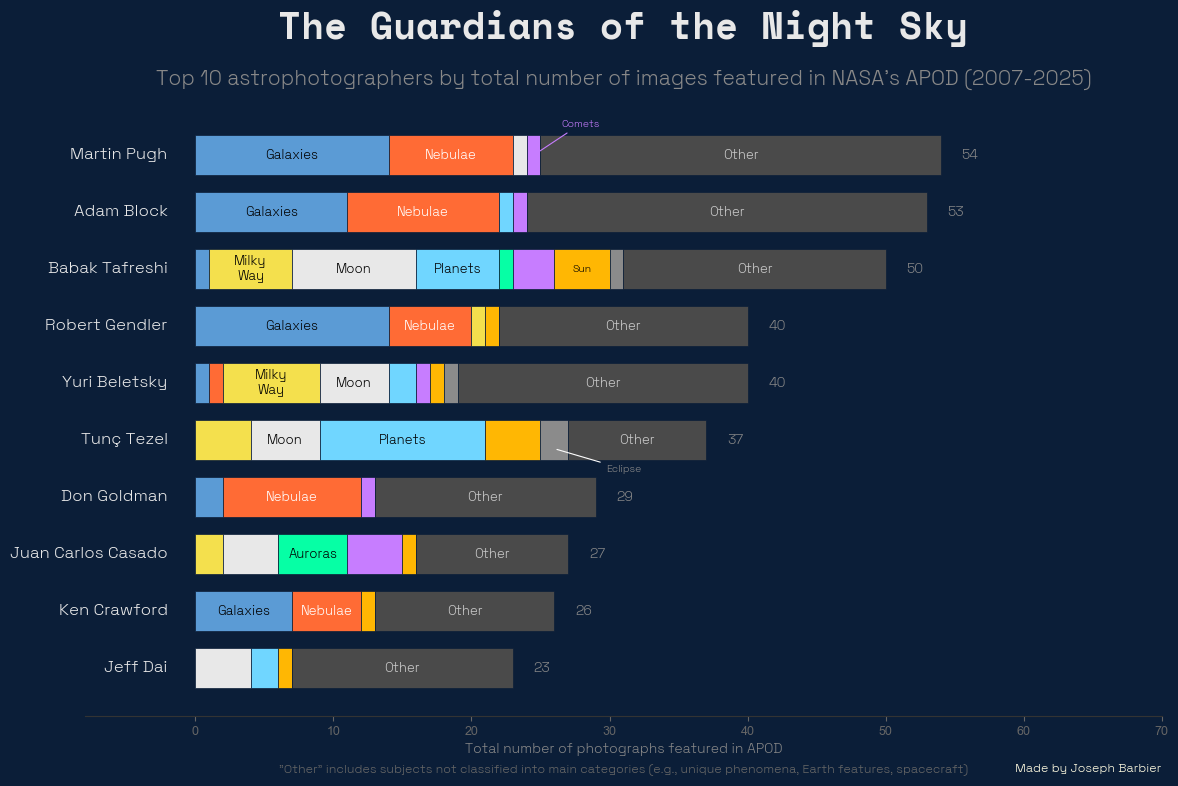

In [11]:

# Colors - vibrant cosmic palette with better contrast
colors = {
    "Galaxies": "#5B9BD5",  # Bright blue (spiral arms)
    "Nebulae": "#FF6B35",  # Vibrant orange-red (emission nebulae)
    "Milky Way": "#F4E04D",  # Bright yellow (galactic core)
    "Moon": "#E8E8E8",  # Bright silver
    "Planets": "#70D6FF",  # Light cyan (gas giants)
    "Auroras": "#06FFA5",  # Bright emerald (northern lights)
    "Comets": "#C77DFF",  # Bright purple (ion tails)
    "Sun": "#FFB703",  # Bright amber (solar corona)
    "Eclipses": "#8B8B8B",  # Medium gray
    "Other": "#4A4A4A",  # Darker gray (unclassified)
}

# Create figure
fig, ax = plt.subplots(figsize=(12, 8), facecolor="#0B1E38")
ax.set_facecolor("#0B1E38")

# Plot stacked horizontal bars
y_pos = range(len(photographers))
left = [0] * len(photographers)

# Order subjects by total contribution for better visual hierarchy
subject_order = [
    "Galaxies",
    "Nebulae",
    "Milky Way",
    "Moon",
    "Planets",
    "Auroras",
    "Comets",
    "Sun",
    "Eclipses",
    "Other",
]

for subj in subject_order:
    values = subject_data[subj]
    bars = ax.barh(
        y_pos,
        values,
        left=left,
        color=colors[subj],
        label=subj if sum(values) > 0 else None,
        height=0.7,
        edgecolor="#0B1E38",
        linewidth=0.5,
    )
    left = [l + v for l, v in zip(left, values)]

# Add photographer names and annotations
for i, (name, total) in enumerate(zip(photographers, left)):
    # Name on the left (outside plot area)
    ax.text(
        -2,
        i,
        name,
        ha="right",
        va="center",
        color="#E8E8E8",
        fontproperties=font_regular,
        fontsize=12,
    )
    # Total count at the end of bar
    ax.text(
        total + 1.5,
        i,
        str(total),
        ha="left",
        va="center",
        color="#888888",
        fontproperties=font_regular,
        fontsize=10,
    )

# Add direct annotations on bars for main subjects (where segments are large enough)
cumulative_left = [0] * len(photographers)
for subj in subject_order:
    values = subject_data[subj]
    for i, value in enumerate(values):
        if value >= 5:  # Only label segments with 5+ images
            bar_center = cumulative_left[i] + value / 2
            # Determine text color for contrast
            text_color = "#FFFFFF" if subj in ["Nebulae", "Comets"] else "#000000"
            text_color = (
                "#CCCCCC" if subj == "Other" else text_color
            )  # Lighter gray for "Other"
            ax.text(
                bar_center,
                i,
                subj.replace(" ", "\n") if " " in subj else subj,
                ha="center",
                va="center",
                color=text_color,
                fontproperties=font_regular,
                fontsize=9.5,
                fontweight="bold",
            )
        cumulative_left[i] += value

# Add strategic annotations for specific unlabeled small segments
# Annotate a few key examples to identify colors without labels

# Comets annotation (purple) - on Martin Pugh's or Adam Block's bar
martin_idx = photographers.index("Martin Pugh")
offset = sum(
    [
        subject_data[s][martin_idx]
        for s in subject_order[: subject_order.index("Comets")]
    ]
)
comet_center = offset + subject_data["Comets"][martin_idx] / 2
ax.annotate(
    "Comets",
    xy=(comet_center, martin_idx),
    xytext=(comet_center + 2, martin_idx + 0.5),
    ha="left",
    color="#C77DFF",
    fontproperties=font_regular,
    fontsize=7.5,
    arrowprops=dict(arrowstyle="-", color="#C77DFF", lw=0.8),
)

# Sun annotation (orange/amber) - on Babak Tafreshi's bar
babak_idx = photographers.index("Babak Tafreshi")
offset = sum(
    [subject_data[s][babak_idx] for s in subject_order[: subject_order.index("Sun")]]
)
sun_center = offset + subject_data["Sun"][babak_idx] / 2
ax.annotate(
    "Sun",
    xy=(sun_center, babak_idx),
    xytext=(sun_center, babak_idx),
    ha="center",
    va="center",
    color="black",
    fontproperties=font_regular,
    fontsize=7.5,
)

# Eclipse annotation (medium gray) - on Tunç Tezel's bar
tunc_idx = photographers.index("Tunç Tezel")
offset = sum(
    [
        subject_data[s][tunc_idx]
        for s in subject_order[: subject_order.index("Eclipses")]
    ]
)
eclipse_center = offset + subject_data["Eclipses"][tunc_idx] / 2
ax.annotate(
    "Eclipse",
    xy=(eclipse_center, tunc_idx - 0.15),
    xytext=(eclipse_center + 5, tunc_idx - 0.55),
    ha="center",
    color="#8B8B8B",
    fontproperties=font_regular,
    fontsize=7.5,
    arrowprops=dict(arrowstyle="-", color="white", lw=0.8),
)

# Clean up axes - maximize data-to-ink ratio
ax.set_yticks([])
ax.set_xlim(-8, 70)  # Start closer to 0 with space for names
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_color("#333333")
ax.tick_params(axis="x", colors="#666666", labelsize=9)
ax.set_xlabel(
    "Total number of photographs featured in APOD",
    color="#888888",
    fontproperties=font_regular,
    fontsize=10,
    fontweight="bold",
)

# Add subtle note about "Other" category
ax.text(
    0.5,
    -0.08,
    '"Other" includes subjects not classified into main categories (e.g., unique phenomena, Earth features, spacecraft)',
    transform=ax.transAxes,
    ha="center",
    va="top",
    color="#666666",
    fontproperties=font_regular,
    fontsize=9,
    style="italic",
)

# Add subtle note about "Other" category
ax.text(
    1,
    -0.08,
    "Made by Joseph Barbier",
    transform=ax.transAxes,
    ha="right",
    va="top",
    color="#fefae0",
    fontproperties=font_regular,
    fontsize=9,
    style="italic",
)

# Title
ax.text(
    0.5,
    1.1,
    "The Guardians of the Night Sky",
    transform=ax.transAxes,
    ha="center",
    va="bottom",
    color="#E8E8E8",
    fontproperties=font_bold,
    fontsize=27,
)
ax.text(
    0.5,
    1.03,
    "Top 10 astrophotographers by total number of images featured in NASA's APOD (2007-2025)",
    transform=ax.transAxes,
    ha="center",
    va="bottom",
    color="#888888",
    fontproperties=font_regular,
    fontsize=15,
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.12, top=0.88)
# plt.savefig(
#     "src/2026/2026-01-20/output.png",
#     dpi=150,
#     facecolor="#0B1E38",
#     bbox_inches="tight",
#     pad_inches=0.3,
# )
plt.show()
plt.close()
